# Introduction 
> The Dataset is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. We'll try to apply some analysis and visualization to understand our dataset and some of preprocessing techniques to prepare it for any ML Model.

> About Dataset and Probelm : https://www.kaggle.com/uciml/sms-spam-collection-dataset

# Importing Libraries and Dataset

In [ ]:
pip install pandas_profiling

In [ ]:
# Installing Stopwords Module in NLTK
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

In [ ]:
df = pd.read_csv('spam_dataset.csv',sep='\t' ,names=['Label','Mail'])
df

,Label,Mail
0,Label,Email
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.drop(index=0,inplace = True)
df

,Label,Mail
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.sample(10)

,Label,Mail
3210,ham,Oops my phone died and I didn't even know. Yea...
3929,ham,Lol ... I really need to remember to eat when ...
487,ham,If we win its really no 1 side for long time.
435,ham,Booked ticket for pongal?
1540,ham,Midnight at the earliest
5395,ham,I dont know exactly could you ask chechi.
172,ham,"Sir, I need AXIS BANK account no and bank addr..."
3974,ham,WOT U UP 2 J?
4973,ham,Hey come online! Use msn... We are all there
5077,spam,"This is the 2nd attempt to contract U, you hav..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 1 to 5572
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Mail    5572 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


# Brief EDA and Visualiaztion

In [ ]:
#Checking null values in dataset
df.isnull().sum()

Label    0
Mail     0
dtype: int64

In [ ]:
df.describe()

,Label,Mail
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### Getting Count of Labels

In [ ]:
df['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [ ]:
df.groupby('Label').describe()

Mail                                                               
      count unique                                                top freq
Label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

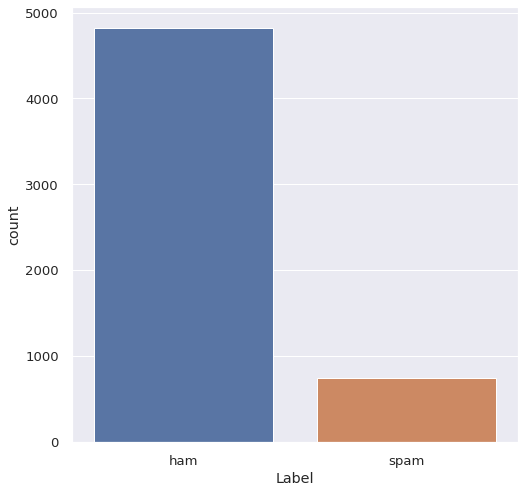

In [ ]:
sns.countplot(x= df['Label'])

### Word Cloud for Mail 


In [ ]:
df.Mail

1       Go until jurong point, crazy.. Available only ...
2                           Ok lar... Joking wif u oni...
3       Free entry in 2 a wkly comp to win FA Cup fina...
4       U dun say so early hor... U c already then say...
5       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568    This is the 2nd time we have tried 2 contact u...
5569                 Will ü b going to esplanade fr home?
5570    Pity, * was in mood for that. So...any other s...
5571    The guy did some bitching but I acted like i'd...
5572                           Rofl. Its true to its name
Name: Mail, Length: 5572, dtype: object

In [ ]:
text = " ".join(mail for mail in df.Mail)

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white',
                       height = 400,width=600).generate(text)

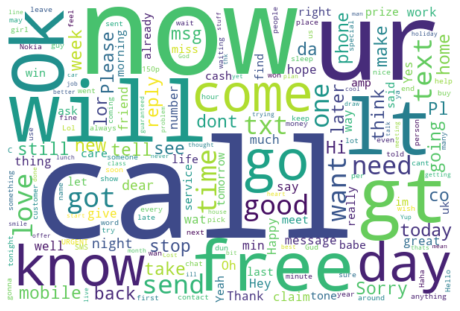

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Create New Feature To know the Mail Length


In [ ]:
# Create New Feature To know the Mail Length
df['Mail Length'] = df['Mail'].apply(len)
df['Mail Length']

1       111
2        29
3       155
4        49
5        61
       ... 
5568    160
5569     36
5570     57
5571    125
5572     26
Name: Mail Length, Length: 5572, dtype: int64

In [ ]:
df

,Label,Mail,Mail Length
1,ham,"Go until jurong point, crazy.. Available only ...",111
2,ham,Ok lar... Joking wif u oni...,29
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
4,ham,U dun say so early hor... U c already then say...,49
5,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,160
5569,ham,Will ü b going to esplanade fr home?,36
5570,ham,"Pity, * was in mood for that. So...any other s...",57
5571,ham,The guy did some bitching but I acted like i'd...,125


### Relation between mail length and its spam or not spam

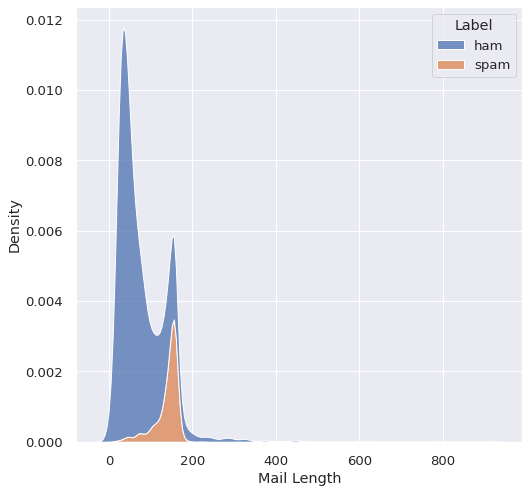

In [ ]:
sns.kdeplot(df['Mail Length'],multiple='stack',hue=df['Label'])

In [ ]:
df['Mail Length'][df['Label']=='ham']

1       111
2        29
4        49
5        61
7        77
       ... 
5566     12
5569     36
5570     57
5571    125
5572     26
Name: Mail Length, Length: 4825, dtype: int64

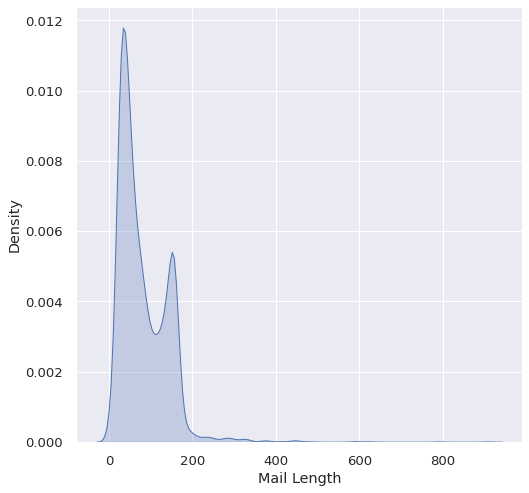

In [ ]:
sns.kdeplot( x=df['Mail Length'],shade=True)

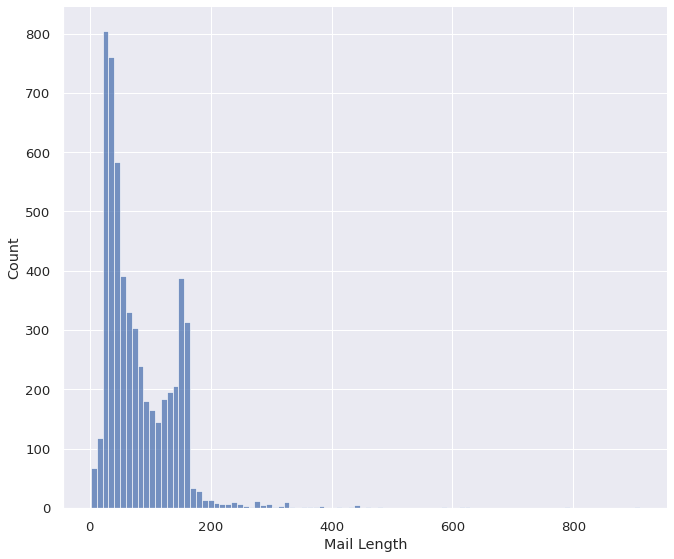

In [ ]:
sns.displot(x=df['Mail Length'],height=8,aspect=1.2)

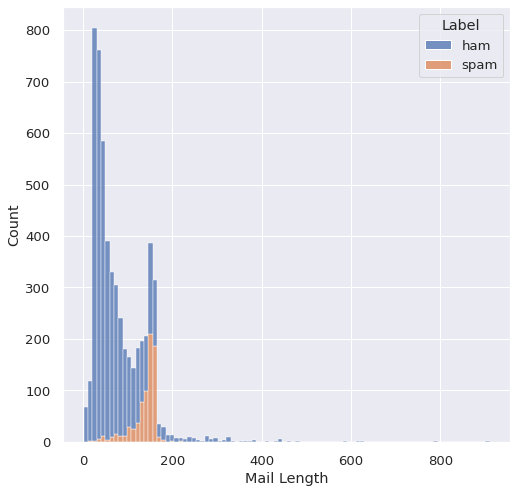

In [ ]:
sns.histplot(x=df['Mail Length'],hue=df['Label'],multiple='stack')

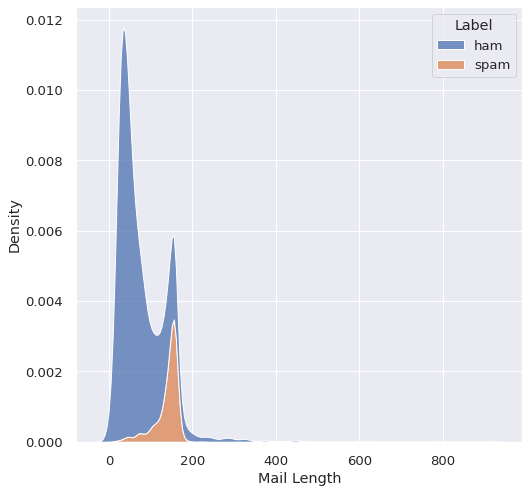

In [ ]:
sns.kdeplot( x=df['Mail Length'],shade=True,hue=df['Label'],multiple='stack')

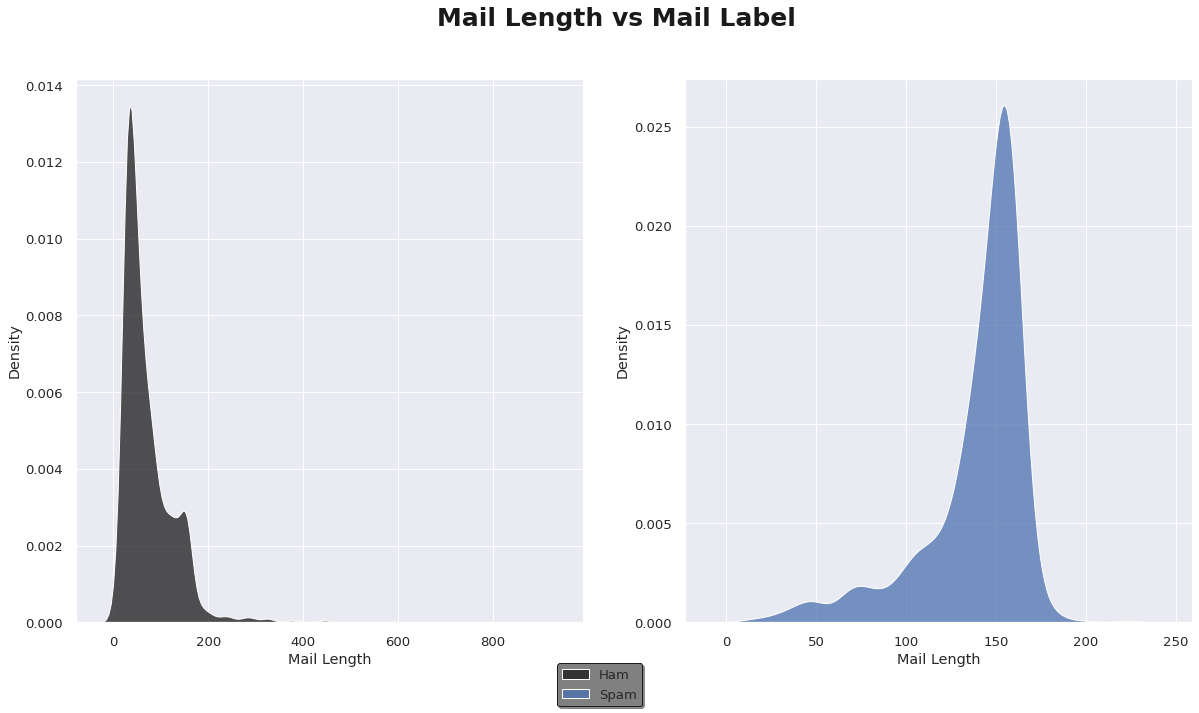

In [ ]:
fig, axes = plt.subplots(1,2 , figsize= (20,10)) 
fig.suptitle ('Mail Length vs Mail Label',fontsize=25,color='k',fontweight='bold')
sns.kdeplot(ax=axes [0], data=df['Mail Length'][df['Label']=='ham'],color='k',shade=True,multiple='stack')
sns.kdeplot(ax=axes [1], data=df['Mail Length'][df['Label']=='spam'],color='b',shade=True,multiple='stack')
fig.legend(['Ham', 'Spam'],loc='lower center' ,shadow = True,edgecolor = 'k',facecolor='grey')

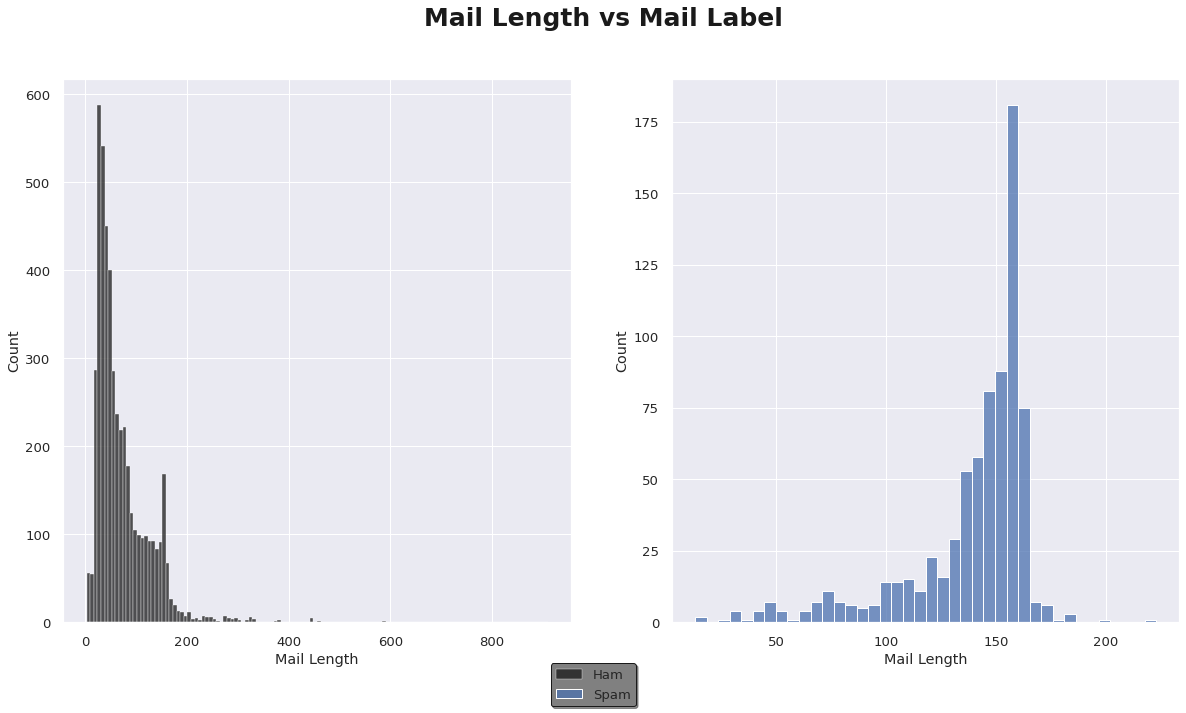

In [ ]:
fig, axes = plt.subplots(1,2 , figsize= (20,10)) 
fig.suptitle ('Mail Length vs Mail Label',fontsize=25,color='k',fontweight='bold')
sns.histplot(ax=axes [0], data=df['Mail Length'][df['Label']=='ham'],color='k')
sns.histplot(ax=axes [1], data=df['Mail Length'][df['Label']=='spam'],color='b')
fig.legend(['Ham', 'Spam'],loc='lower center' ,shadow = True,edgecolor = 'k',facecolor='grey')

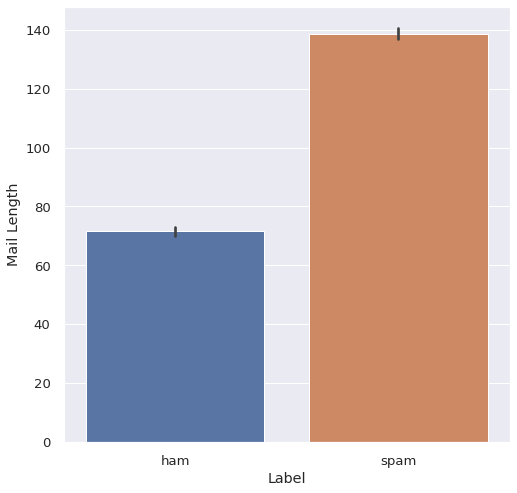

In [ ]:
# Average of Mail Length in Case of its spam or not spam
sns.barplot(x=df['Label'],y=df['Mail Length'])

**Ok now we can say that as number of character in mail increase the probability to be added to spam increase**

### Final Overview for the Dataset

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Preprocessing

In [ ]:
#Checking Stopwords in nltk for english 
for i in stopwords.words('english') :
  print(i)

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't


###Method for Removing Stopwords and  Punctuations 

In [ ]:
def text_process(text):

    #Checking characters to see if they are in punctuation
    char_list = [char for char in text if char not in string.punctuation]

    #Returning text to its orginal form.
    all_text = ''.join(char_list)
    
    #Removing any stopwords
    return [word for word in all_text.split() if word.lower() not in stopwords.words('english')]

In [ ]:
#Checking Funtction
df['Mail'].apply(text_process).head(5)

1    [Go, jurong, point, crazy, Available, bugis, n...
2                       [Ok, lar, Joking, wif, u, oni]
3    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
4        [U, dun, say, early, hor, U, c, already, say]
5    [Nah, dont, think, goes, usf, lives, around, t...
Name: Mail, dtype: object

### Splitting

In [ ]:
x = df['Mail']
y = df["Label"]
x

1       Go until jurong point, crazy.. Available only ...
2                           Ok lar... Joking wif u oni...
3       Free entry in 2 a wkly comp to win FA Cup fina...
4       U dun say so early hor... U c already then say...
5       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568    This is the 2nd time we have tried 2 contact u...
5569                 Will ü b going to esplanade fr home?
5570    Pity, * was in mood for that. So...any other s...
5571    The guy did some bitching but I acted like i'd...
5572                           Rofl. Its true to its name
Name: Mail, Length: 5572, dtype: object

In [ ]:
y

1        ham
2        ham
3       spam
4        ham
5        ham
        ... 
5568    spam
5569     ham
5570     ham
5571     ham
5572     ham
Name: Label, Length: 5572, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train.shape

(4457,)

In [ ]:
x_test.shape

(1115,)

### Applying TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer=TfidfVectorizer(analyzer=text_process,stop_words='english')
tfidf_transformer.fit(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  "The parameter 'stop_words' will not be used"


TfidfVectorizer(analyzer=<function text_process at 0x7f48ff50ab00>,
                stop_words='english')

In [ ]:
x_train = tfidf_transformer.transform(x_train)
x_test = tfidf_transformer.transform(x_test)

In [ ]:
x_train.shape

(4457, 10135)

In [ ]:
x_test.shape

(1115, 10135)

# Modelling and Evalution

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(kernel='rbf'),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(n_estimators=70),
    "XGB": XGBClassifier(n_estimators=70),
    "Naive Bayes " : MultinomialNB()
}

In [ ]:
for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('-'*60)

Training Model LR 
-----------------------------------------------
Training Accuracy: 0.9598384563607808
Testing Accuracy: 0.9587443946188341
Testing Confusion Matrix: 
[[975   0]
 [ 46  94]]
------------------------------------------------------------
Training Model KNN 
-----------------------------------------------
Training Accuracy: 0.9102535337671079
Testing Accuracy: 0.9067264573991032
Testing Confusion Matrix: 
[[975   0]
 [104  36]]
------------------------------------------------------------
Training Model SVC 
-----------------------------------------------
Training Accuracy: 0.99798070450976
Testing Accuracy: 0.9757847533632287
Testing Confusion Matrix: 
[[975   0]
 [ 27 113]]
------------------------------------------------------------
Training Model DT 
-----------------------------------------------
Training Accuracy: 1.0
Testing Accuracy: 0.9695067264573991
Testing Confusion Matrix: 
[[967   8]
 [ 26 114]]
------------------------------------------------------------
Tra

In [ ]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print('Frist 10 Real Outputs in Testing : \n ', y_test[:10].values)
print('--'*50)
print('Frist 10 Predicated Outputs in Testing : \n ', y_pred[:10])

Frist 10 Real Outputs in Testing : 
  ['ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham']
----------------------------------------------------------------------------------------------------
Frist 10 Predicated Outputs in Testing : 
  ['ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham']


In [ ]:
y_compare={'y_test':y_test, 'y_predicted':y_pred}
pd.DataFrame(y_compare)

,y_test,y_predicted
2603,ham,ham
3966,ham,ham
4218,ham,ham
5375,ham,ham
4603,spam,spam
...,...,...
723,ham,ham
2684,ham,ham
1719,spam,ham
1725,ham,ham


In [ ]:
print('Training Score is : ' , model.score(x_train, y_train))
print( '--'*50)
print('Testing Score is : ' , model.score(x_test, y_test))

Training Score is :  0.99798070450976
----------------------------------------------------------------------------------------------------
Testing Score is :  0.9757847533632287


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
print('confusion Matrix :')  
print('--'*30)
print(confusion_matrix(y_test,y_pred))

confusion Matrix :
------------------------------------------------------------
[[975   0]
 [ 27 113]]


In [ ]:
matrix = classification_report(y_test,y_pred)
print('Classification report :')
print('--'*30)
print(matrix)


Classification report :
------------------------------------------------------------
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       975
        spam       1.00      0.81      0.89       140

    accuracy                           0.98      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.98      0.98      0.97      1115

